# Tugas 5 PCD (IMAGE ENHANCEMENT)
## NAMA : MUH.IKHSAN
## NIM  : H071191049

## IMPORT PACKAGE DAN PERSIAPAN METHOD/FUNGSI

In [247]:
# Import Package
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import math
from skimage.filters import gaussian
from skimage.util import random_noise
from skimage import exposure
from scipy.signal import medfilt2d,convolve

In [248]:
# Fungsi Untuk Melakukan Constrast Strecth
def contrast_stretch(img, lower_handler, higher_handler, beta):
    logical_1 = np.logical_and(img<lower_handler, img>=0)
    logical_2 = np.logical_and(img>=lower_handler, img <higher_handler)
    logical_3 = np.logical_and(img >= higher_handler, img< 256)
    
    beta_1 = beta*(img-lower_handler)
    beta_2 = beta*(higher_handler-lower_handler)
    
    result = np.where(logical_1, 0 , (np.where(logical_2, beta_1, (np.where(logical_3, beta_2, img)))))
    return result

In [249]:
# Fungsi Untuk Melakukan Sharping (Penajaman Gambar) dengan malakukan Konvulusi
def img_sharpening(img ,kernel, mode="full"):
        img = np.copy(img)
        if img.max() >1:
            img = img/255
            
        # Mode yang digunakan dalam konvolusi
        if mode=="full":
            if len(img.shape)==2:
                return nd.convolve(img, kernel)
            elif len(img.shape)==3:
                red_channel = np.clip(nd.convolve(img[:,:,0], kernel),0,1)
                green_channel = np.clip(nd.convolve(img[:,:,1], kernel),0,1)
                blue_channel = np.clip(nd.convolve(img[:,:,2], kernel),0,1)
                
                return np.dstack((red_channel,green_channel,blue_channel))
        else:
            if len(img.shape)==2:
                return convolve(img, kernel,mode="{mod}".format(mod=mode))
            elif len(img.shape)==3:
                red_channel = np.clip(convolve(img[:,:,0], kernel,mode="{mod}".format(mod=mode)),0,1)
                green_channel = np.clip(convolve(img[:,:,1], kernel,mode="{mod}".format(mod=mode)),0,1)
                blue_channel = np.clip(convolve(img[:,:,2], kernel, mode="{mod}".format(mod=mode)),0,1)
                return np.dstack((red_channel,green_channel,blue_channel))

In [250]:
# Fungsi untuk unsharp masking dan high boost
def sharpening_filters(img, kernel, alpha=1):
    if(alpha > 1):
        alpha = alpha-1
        
    lowpass = img_sharpening(us, G, 'same')

    highpass = np.array(us - lowpass)
    highpass = np.clip(highpass,0,1)

    sharp_img = np.array((alpha)*us + highpass)
    sharp_img = np.clip(sharp_img,0,1)

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    ax[0][0].imshow(us, cmap="gray")
    ax[0][1].imshow(lowpass, cmap="gray")
    ax[1][0].imshow(highpass, cmap="gray")
    ax[1][1].imshow(sharp_img, cmap="gray")
    ax[0][0].set_title('Orginal')
    ax[0][1].set_title('LowPass')
    ax[1][0].set_title('HighPass')
    ax[1][1].set_title('Sharp')

In [251]:
# Fungsi Untuk Menghasilkan Noise
def generate_noise_result(img, noise_sample):
    noise_factor = 0.1
    cur_amount = 1
    noise_container = []
    
    # Mengubah img dari uint8 menjadi float
    noise_result = np.array(img/255, dtype=float)
    
    # Mengisi container dengan gambar noise
    for i in range(noise_sample):
        noise_container.append(random_noise(img, mode="s&p", amount=cur_amount, clip=True))
        cur_amount = cur_amount - noise_factor
        
    # Menjumlahkan setiap gambar noise
    for i in noise_container:
        noise_result += i
        
    # Membagi gambar dengan jumlah noise yang digunakan
    noise_result=noise_result/(noise_sample+1)
    
    return np.array(255*noise_result, dtype='uint8')

## Bagian (1)

### 1.1 Pencerahan Citra (Image Brightening)

Text(0.5, 1.0, 'After')

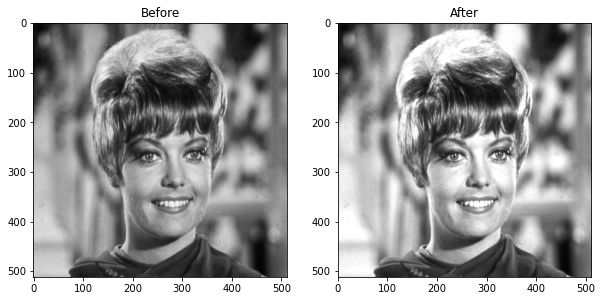

In [252]:
# Memuat Gambar
im1_1 = imageio.imread('assets/zelda.bmp', as_gray=True).astype('uint64')
# Menambah nilai pixel dengan 100
result1_1 = im1_1 + 100
# Menerapkan clipping pada nilai pixel diluar interval [0,255]
result1_1 = np.clip(result1_1,0,255)
# Ploting Untuk menampilkan gambar
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im1_1, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(result1_1, cmap="gray")
ax[1].set_title("After")

### 1.2 Menegatifkan Citra (Image Negatives)

Text(0.5, 1.0, 'After')

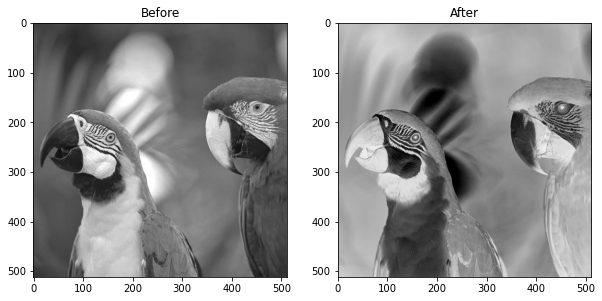

In [253]:
# Meload citra grayscale 
im1_2 = imageio.imread("assets/beo.jpg", as_gray=True).astype(np.float64)
# Melakukan invers pada citra
result1_2 = 255 - im1_2
# Show dengan subplots
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im1_2, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(result1_2, cmap="gray")
ax[1].set_title("After")

### 1.3 Transformasi Log

_$ c = 100 $_

Text(0.5, 1.0, 'After')

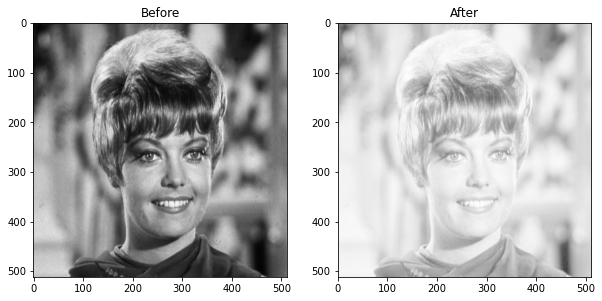

In [254]:
# Memuat Citra
im1_3 = imageio.imread("assets/zelda.bmp")

# melakukan transformasi log  sesuai fungsi s=c log(1+r)
c = 100
result1_3 = c*np.log10(1+im1_3)
result1_3 = np.clip(result1_3, 0,255)

# Show image dengan menerapkan ploting
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im1_3, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(result1_3.astype(np.uint8), cmap="gray")
ax[1].set_title("After")

### 1.4 Transformasi Pangkat

_$ c = 1 $ dan $ \gamma = 5 $_

Text(0.5, 1.0, 'After y=5')

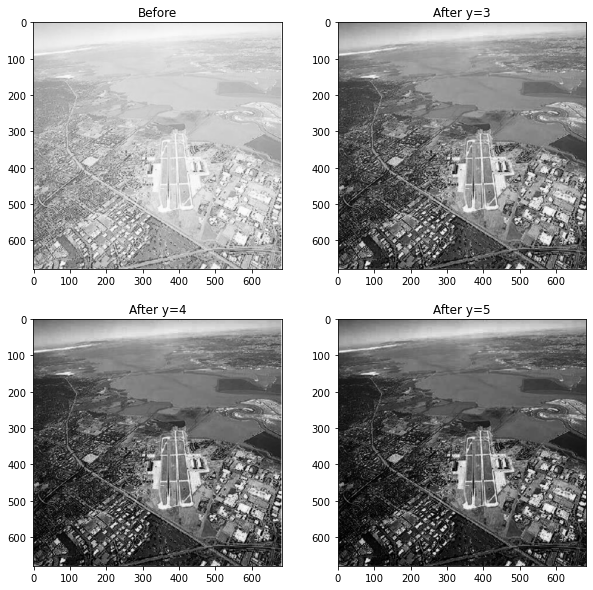

In [255]:
# Memuat Citra
im1_4 = imageio.imread("assets/aerial_image.png")
# c dan y
y1 = 3.0
y2 = 4.0
y3 = 5.0
# Melakukan transformasi pangkat
result1_4a = np.array(255*(im1_4/255) ** y1, dtype="uint8")
result1_4b = np.array(255*(im1_4/255) ** y2, dtype="uint8")
result1_4c = np.array(255*(im1_4/255) ** y3, dtype="uint8")
# Show citra
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(im1_4, cmap="gray")
ax[0][0].set_title("Before")
ax[0][1].imshow(result1_4a, cmap="gray")
ax[0][1].set_title("After y=3")
ax[1][0].imshow(result1_4b, cmap="gray")
ax[1][0].set_title("After y=4")
ax[1][1].imshow(result1_4c, cmap="gray")
ax[1][1].set_title("After y=5")

### 1.5 Peregangan (Contrast Streching)

Text(0.5, 1.0, 'After')

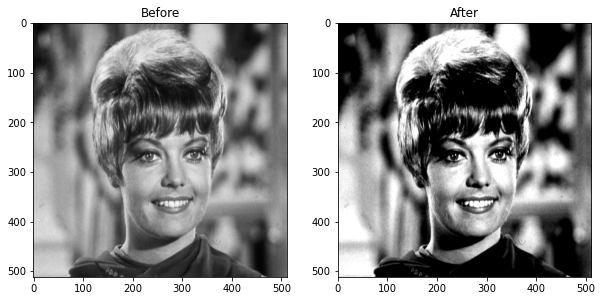

In [256]:
# Meload Citra
im1_5 = imageio.imread("assets/zelda.bmp")
# Menerapkan fungsi contrast stretch
result1_5 = contrast_stretch(im1_5,50,150,2)
# Menampilkan citra
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(contrast_test_image, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(ct_result, cmap="gray")
ax[1].set_title("After")

### 1.6 Gray-Level Slicing

Text(0.5, 1.0, 'After')

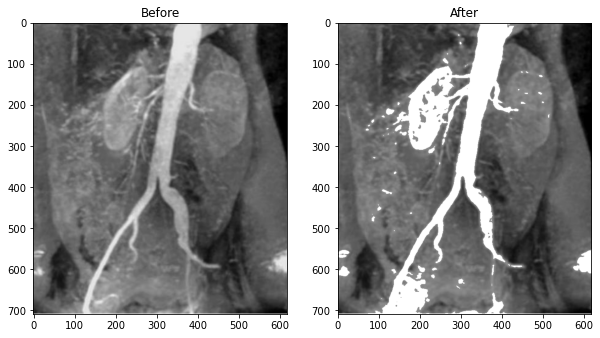

In [257]:
# Memuat Citra
im1_6 = imageio.imread('assets/ginjal.png')
# Melakukan pergeseran berdasrakan nilai batas 142 dan 250
logic1_6 = np.logical_and(im1_6>142, im1_6<250)
result1_6 = np.where(logic1_6, 255, im1_6)
# Mencetak Citra
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(gls_image, cmap="gray")
ax[0].set_title("Before")
ax[1].imshow(gls_result, cmap="gray")
ax[1].set_title("After")

### 1.7 Bit-plane Slicing

Text(0.5, 1.0, 'Bits 1')

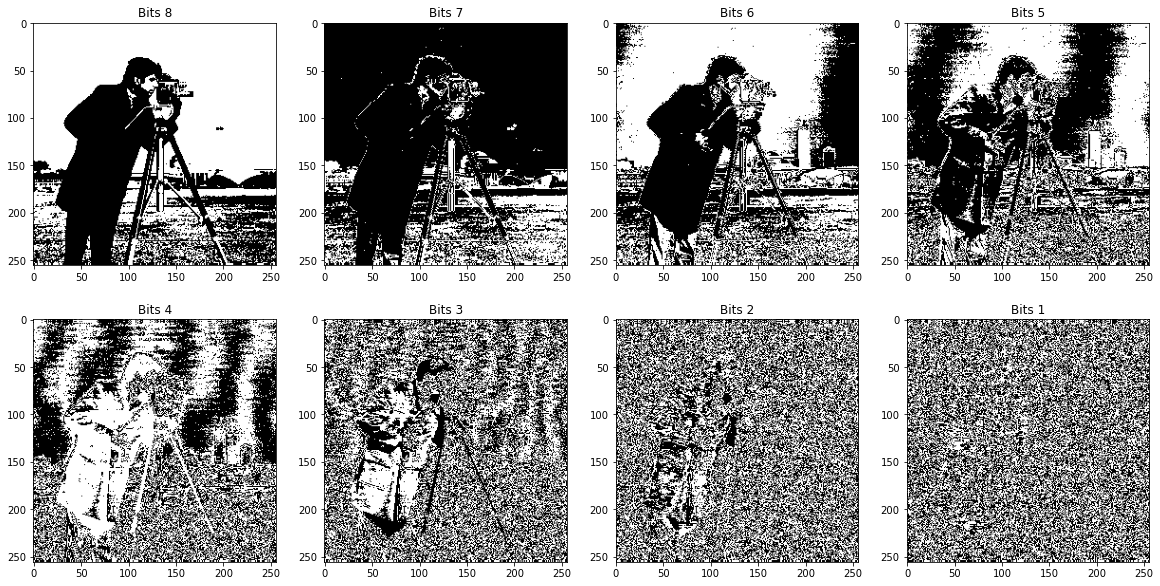

In [258]:
# Memuat Citra
im1_7 = imageio.imread('assets/camera.bmp')

# Operasi Bit Plane Slicing
lst = []
for i in range(im1_7.shape[0]):
    for j in range(im1_7.shape[1]):
        lst.append(np.binary_repr(im1_7[i][j], width=8))
c_bit8 = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit7 = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit6 = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit5 = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit4 = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit3 = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit2 = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(im1_7.shape[0],im1_7.shape[1])
c_bit1 = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(im1_7.shape[0],im1_7.shape[1])

# Menampilkan citra
fig, ax = plt.subplots(2,4, figsize=(20,10))
ax[0][0].imshow(c_bit8, cmap="gray")
ax[0][0].set_title("Bits 8")
ax[0][1].imshow(c_bit7, cmap="gray")
ax[0][1].set_title("Bits 7")
ax[0][2].imshow(c_bit6, cmap="gray")
ax[0][2].set_title("Bits 6")
ax[0][3].imshow(c_bit5, cmap="gray")
ax[0][3].set_title("Bits 5")
ax[1][0].imshow(c_bit4, cmap="gray")
ax[1][0].set_title("Bits 4")
ax[1][1].imshow(c_bit3, cmap="gray")
ax[1][1].set_title("Bits 3")
ax[1][2].imshow(c_bit2, cmap="gray")
ax[1][2].set_title("Bits 2")
ax[1][3].imshow(c_bit1, cmap="gray")
ax[1][3].set_title("Bits 1")

## Bagian (2)

### 2.1 Peregangan Kontras (revisited)

Text(0.5, 1.0, 'After histogram')

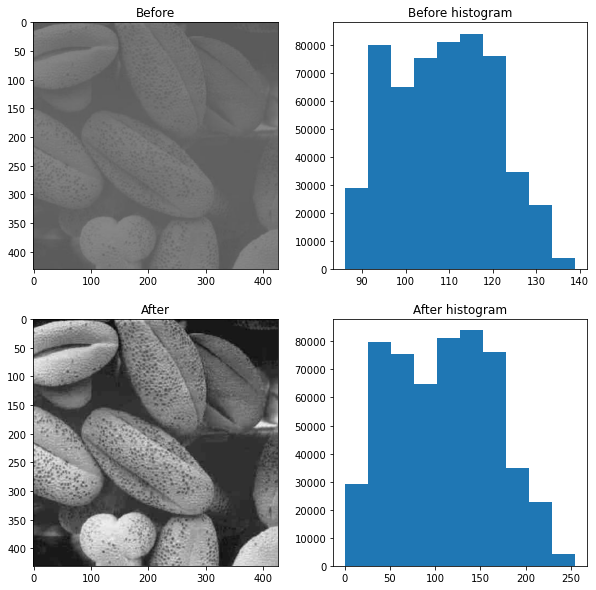

In [274]:
# Memuat Citra
im2_1 = imageio.imread('assets/coffee.png')

# Operasi Peregangan Konstras
min2_1 = im2_1.min()
max2_1 = im2_1.max()
r_m = 255/(max2_1 - min2_1)
r_c = 255-r_m*max2_1
result2_1 = (r_m*im2_1 + r_c).astype(np.uint8)

# Menghasilkan histogram dari gambar
hist, bins = np.histogram(im2_1.flatten(),256,[0,256])

# Mencetak citra
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0][0].imshow(im2_1, cmap="gray")
ax[0][0].set_title("Before")
ax[0][1].hist(im2_1.flatten())
ax[0][1].set_title('Before histogram')
ax[1][0].imshow(result2_1, cmap="gray")
ax[1][0].set_title("After")
ax[1][1].hist(result2_1.flatten())
ax[1][1].set_title('After histogram')

### 2.2 Perataan Histogram

Text(0.5, 1.0, 'After histogram')

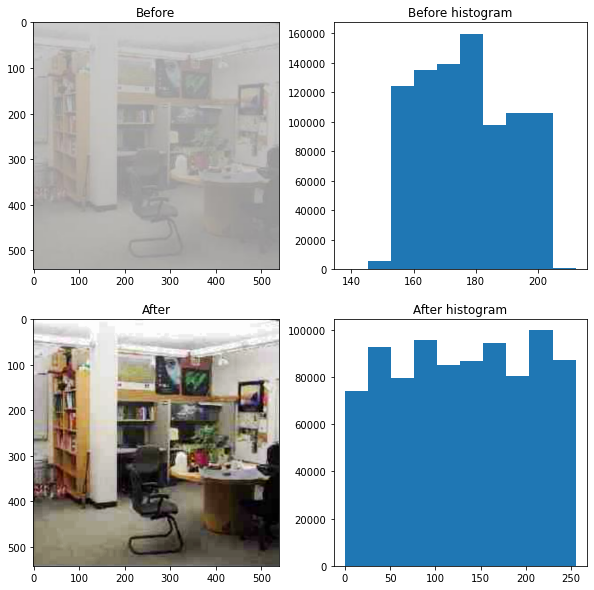

In [260]:
# Memuat Citra
im2_2 = imageio.imread('assets/room.png')
hist, bins = np.histogram(im2_2.flatten(),256,[0,256])
# Memberikan nilai kumulatif dari hist
hist_eq = hist.cumsum()
# Melakukan normalisasi pada interval gambar
hist_eq_normalized = hist_eq * hist.max()/ hist_eq.max()
hist_eq_m = np.ma.masked_equal(hist_eq,0)
hist_eq_m = (hist_eq_m - hist_eq_m.min())*255/(hist_eq_m.max()-hist_eq_m.min())
hist_eq = np.ma.filled(hist_eq_m,0).astype('uint8')
result2_2 = hist_eq[im2_2]

# Mencetak
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].imshow(im2_2)
ax[0][0].set_title("Before")
ax[0][1].hist(im2_2.flatten())
ax[0][1].set_title('Before histogram')
ax[1][0].imshow(result2_2)
ax[1][0].set_title("After")
ax[1][1].hist(result2_2.flatten())
ax[1][1].set_title('After histogram')

### 2.3 Spesifikasi Histogram / Histogram Matching

Text(0.5, 1.0, 'Result')

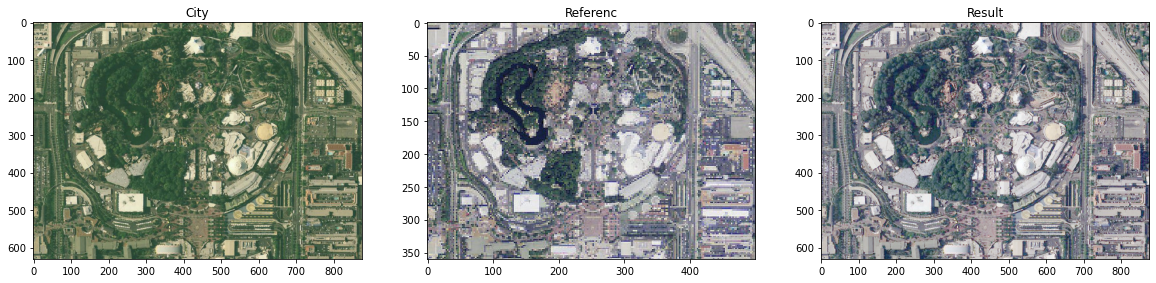

In [261]:
im2_3 = imageio.imread('assets/city.jpg')
ref2_3 = imageio.imread('assets/city_ref.jpg')
multi = True if im2_3.shape[-1] > 1 else False

#Melakukan operasi historgram matching pada gambar im2_3
matched = exposure.match_histograms(im2_3, ref2_3, multichannel=multi)

figure, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(im2_3)
ax[0].set_title('City')
ax[1].imshow(ref2_3)
ax[1].set_title('Referenc')
ax[2].imshow(matched)
ax[2].set_title('Result')

### 2.4 Operasi AND dan OR

> #### 2.4.1 Operasi AND

Text(0.5, 1.0, 'Result')

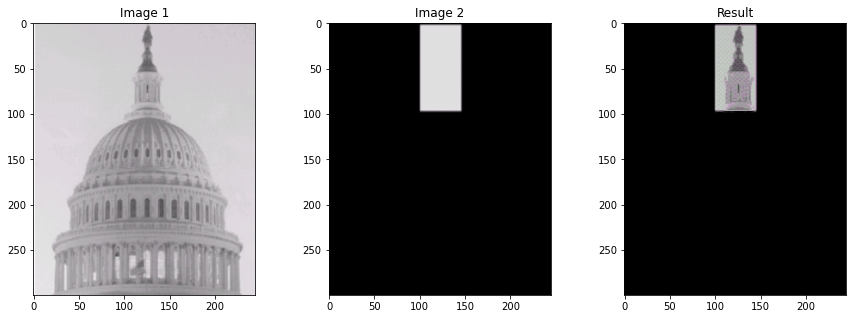

In [262]:
# Memuat asset
im2_4 = imageio.imread('assets/building.png')
bb2_4a = imageio.imread('assets/black_base.png')
lb2_4a = imageio.imread('assets/light_base.png')

# Melakukan crop pada image (300x245)
im2_4 = im2_4[0:300,0:245]
bb2_4a = bb2_4a[0:300,0:245]
lb2_4a = lb2_4a[0:300,0:245]

# Menampilkan citra
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(im2_4)
ax[1].imshow(bb2_4a)
# Mencetak hasil operasi and pada gambar
ax[2].imshow(im2_4 & bb2_4a)
ax[0].set_title('Image 1')
ax[1].set_title('Image 2')
ax[2].set_title('Result')

> #### 2.4.2 Operasi OR 

Text(0.5, 1.0, 'Result')

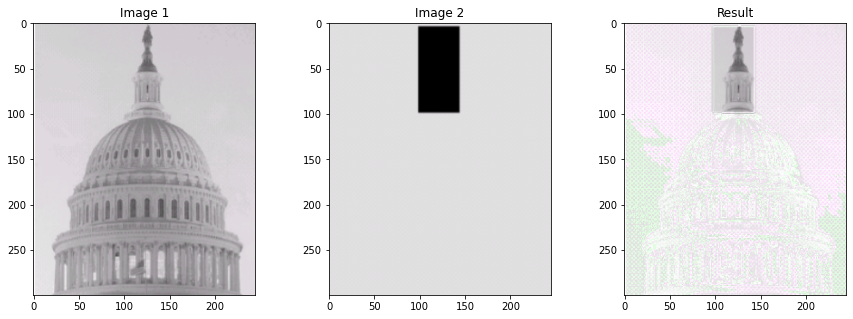

In [263]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(im2_4)
ax[1].imshow(lb2_4a)
# Mencetak hasil operasi and pada gambar
ax[2].imshow(im2_4 | lb2_4a)
ax[0].set_title('Image 1')
ax[1].set_title('Image 2')
ax[2].set_title('Result')

### 2.5 Operasi Pengurangan

Text(0.5, 1.0, 'Result')

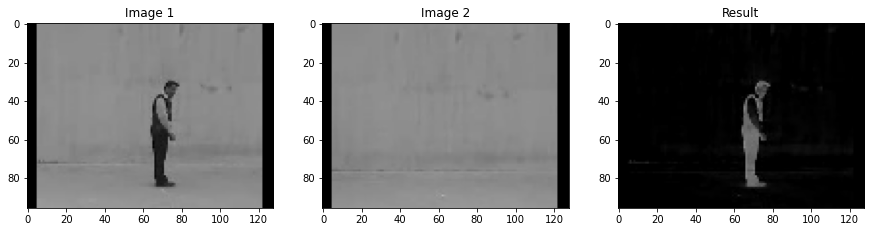

In [264]:
# Memuat Citra
im2_5_man = imageio.imread('assets/man.png')
im2_5_bg = imageio.imread('assets/background.png')

# Melakukan pengurangan
result_subtraction = np.array(im2_5_bg - im2_5_man)
# Melakukan clipping pada pixel yang negative
result_subtraction[im2_5_man>im2_5_bg] = 0

# Menampilkan
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(im2_5_man)
ax[1].imshow(im2_5_bg)
ax[2].imshow(result_subtraction)
ax[0].set_title('Image 1')
ax[1].set_title('Image 2')
ax[2].set_title('Result')

### 2.6 Operasi Penjumlahan


Text(0.5, 1.0, 'Using 10 noise images')

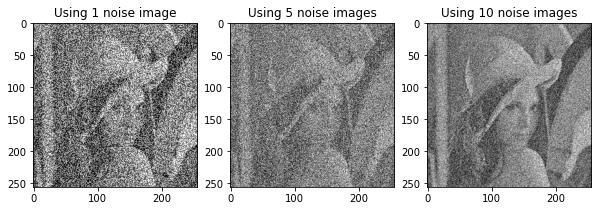

In [265]:
# Memuat Citra
im2_6 = imageio.imread('assets/Lena.bmp')
# Memproses gambar noise berdasarkan jumlah noise yang ditentukan
result2_6_1 = generate_noise_result(im2_6,1)
result2_6_5 = generate_noise_result(im2_6,5)
result2_6_10 = generate_noise_result(im2_6,10)
# Menampilkan citra
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(result2_6_1, cmap="gray")
ax[0].set_title('Using 1 noise image')
ax[1].imshow(result2_6_5, cmap="gray")
ax[1].set_title('Using 5 noise images')
ax[2].imshow(result2_6_10, cmap="gray")
ax[2].set_title('Using 10 noise images')

### 2.7 Operasi Perkalian

Text(0.5, 1.0, 'Result')

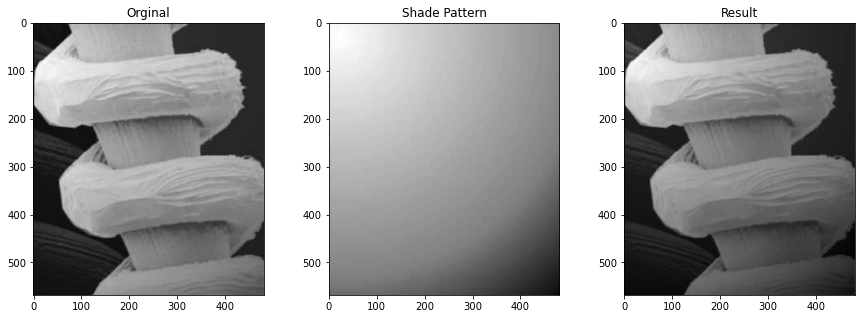

In [266]:
im2_7 = imageio.imread('assets/shading.png', as_gray=True);
im2_7 = im2_7[0:568,0:482]

pattern2_7 = imageio.imread('assets/shading_pattern.png', as_gray=True)
pattern2_7 = pattern2_7[0:568,0:482]

result2_7 = im2_7*pattern2_7
result2_7 = result2_7/result2_7.max()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(im2_7, cmap="gray")
ax[0].set_title('Orginal')
ax[1].imshow(pattern2_7, cmap="gray")
ax[1].set_title('Shade Pattern')
ax[2].imshow(result2_7, cmap='gray')
ax[2].set_title('Result')

## Bagian (3)

### 3.1 Penapis Rerata


Text(0.5, 1.0, 'Filtered')

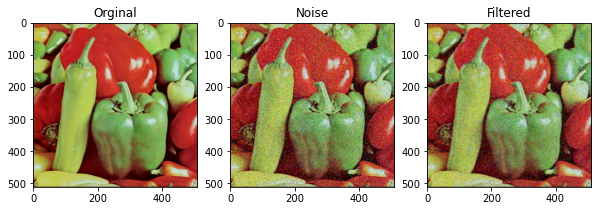

In [267]:
# Memuat Citra
im3_1 = imageio.imread('assets/peppers512warna.bmp')
# Menerapkan noise pada gambar dengan mode 'salt & im3_1 dengan jumlah 0,1'
im3_1_noise = random_noise(im3_1, mode="s&p", amount=0.1)
# Menerapkan penajaman gambar
G = np.zeros((3,3))+(1/9)
im3_1_filter = image_sharpening(im3_1_noise,G)
# Menampilkan citra
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(im3_1, cmap="gray")
ax[1].imshow(im3_1_noise, cmap="gray")
ax[2].imshow(im3_1_filter, cmap='gray')
ax[0].set_title('Orginal')
ax[1].set_title('Noise')
ax[2].set_title('Filtered')

### 3.2 Gaussian Smoothing

Text(0.5, 1.0, 'sigma=4')

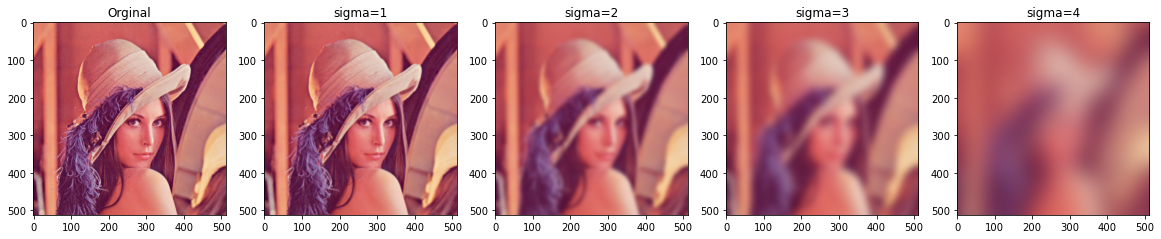

In [268]:
# Memuat Citra
im3_2 = imageio.imread('assets/Lena512warna.bmp')
# Menerapkan gaussian filter dengan nilai sigma tertentu sekaligus tidak mengubah gambar menjadi grayscale
sigma1 = gaussian(im3_2, sigma=1, multichannel=True)
sigma5 = gaussian(im3_2, sigma=5, multichannel=True)
sigma10 = gaussian(im3_2, sigma=10, multichannel=True)
sigma30 = gaussian(im3_2, sigma=30, multichannel=True)
# Menampilkan Citra
fig, ax = plt.subplots(1,5,figsize=(20,20))
ax[0].imshow(im3_2)
ax[1].imshow(sigma1,)
ax[2].imshow(sigma5)
ax[3].imshow(sigma10)
ax[4].imshow(sigma30)
ax[0].set_title('Orginal')
ax[1].set_title('sigma=1')
ax[2].set_title('sigma=2')
ax[3].set_title('sigma=3')
ax[4].set_title('sigma=4')

### 3.3 Penapis Nirlanjar Median

Text(0.5, 1.0, 'Filtered')

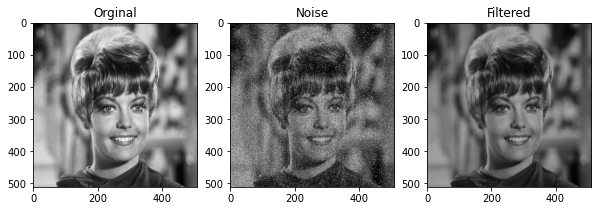

In [269]:
im3_3 = imageio.imread('assets/zelda.bmp');

# Menerapkan noise ke citra
noise3_3 = random_noise(im3_3, mode="s&p", amount=0.1)
noise3_3 = np.array(255*noise3_3, dtype="uint8")
# Menerapkan filter
filter3_3 = medfilt2d(noise_image, [3,3])

# Menampilkan citra
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(im3_3, cmap="gray")
ax[1].imshow(noise3_3, cmap="gray")
ax[2].imshow(filter3_3, cmap='gray')
ax[0].set_title('Orginal')
ax[1].set_title('Noise')
ax[2].set_title('Filtered')

### 3.4 Penapis Lolos-Tinggi

Text(0.5, 1.0, 'HighPass')

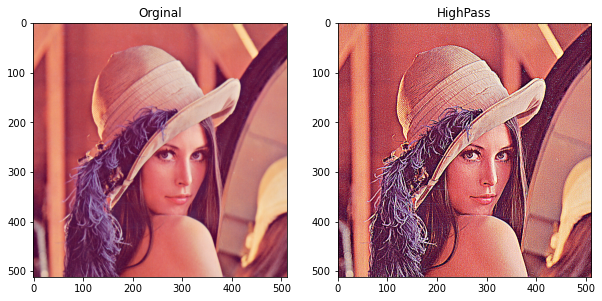

In [270]:
# Memuat Citra
im3_4 = imageio.imread('assets/Lena512warna.bmp')
im3_4hp = np.array(im3_4, dtype=float)
# Kernel
G = np.array([[-1,-1,-1],
             [-1,9,-1], 
             [-1,-1,-1]]) 
# Melakukan proses sharpening
result3_4 = image_sharpening(im3_4hp,G)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(im3_4hp/255)
ax[1].imshow(result3_4)
ax[0].set_title('Orginal')
ax[1].set_title('HighPass')

### 3.7 Unsharp Masking

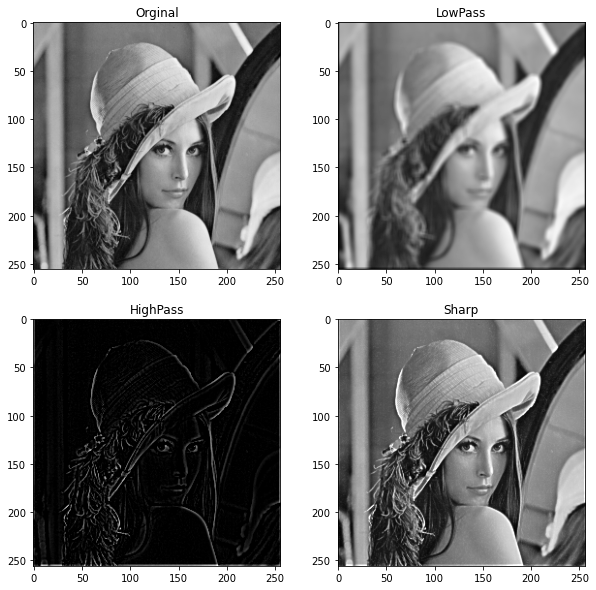

In [271]:
im3_7 = imageio.imread('assets/Lena.bmp', as_gray=True)
# Mengubah tipe gambar menjadi float
us = np.array(im3_7, dtype=float)/255
# Menghasilkan kernel penapis rerata dengan nilai 1/25
G = np.zeros((5,5)) + 0.04
# Melakukan Shapening pada gambar
sharpening_filters(us,G)

### 3.7b High Boost

> #### 3.7b.1 Untuk _$\alpha = 2.4$_

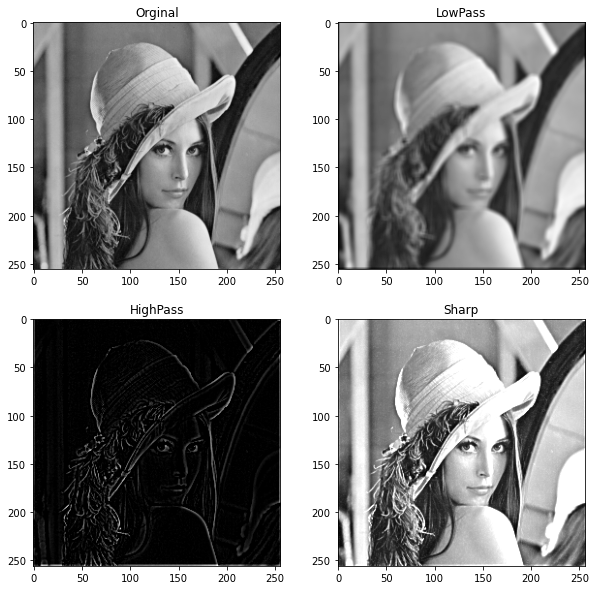

In [272]:
# Nilai alpha
A = 2.4

# Melakukan proses sharpening dengan nilai alpha tertentu
sharpening_filters(us,G,alpha=A)


> #### 3.7b.2 Untuk _$\alpha = 2.4$_

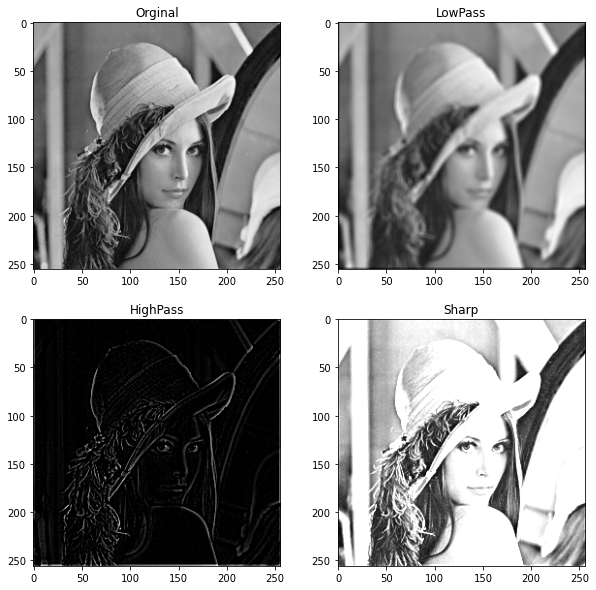

In [273]:
A = 2.9

sharpening_filters(us,G,alpha=A)